# Flight Price Prediction

# Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.


# Exploring Data

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Training Dataset
df= pd.read_excel(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\week 3\Flight price\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Now importing  testing dataset

dff=pd.read_excel(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\week 3\Flight price\Test_set.xlsx")
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
# lets see the shape pf training and testing dataset
print('Training Dataset Shape: ' , df.shape)

print('Testing Dataset Shape: ' , dff.shape)

Training Dataset Shape:  (10683, 11)
Testing Dataset Shape:  (2671, 10)


## Features Information:

1) Airline: The name of the airline.
    
2) Date_of_Journey: The date of the journey .
    
3) Source: The source from which the service begins.
    
4) Destination: The destination where the service ends.
    
5) Route: The route taken by the flight to reach the destination.
    
6) Dep_Time: The time when the journey starts from the source.
    
7) Arrival_Time: Time of arrival at the destination.
    
8) Duration: Total duration of the flight.
    
9) Total_Stops: Total stops between the source and destination.
    
10) Additional_Info: Additional information about the flight.
    
11) Price: The price of the ticket.

##### First of all we must treat the training data and do some analysis with it.

## A) Training Dataset

### EDA:

In [5]:
# Lets check the shape
df.shape

(10683, 11)

In [6]:
# checking diffrent feature and label
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
# checking datatype
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
# Lets check our datset for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Checking unique values of each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("________________________________________")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
________________________________________
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019    

In [11]:
# Treating null values with there mode as those two columns are categorical


df["Route"] = df["Route"].fillna(df["Route"].mode()[0])

df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [12]:
# checking for null values again 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
#Checking for empty entries if ant
df.loc[df['Price'] == " "]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


## Feature Engineering

In [14]:
#Converting object data type to datetime datatype 

df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])

df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])

df['Arrival_Time'] =  pd.to_datetime(df['Arrival_Time'])

In [15]:
# nowb lets check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [16]:
#Extracting journey year,month and day from Date_of_journey

#Extracting year
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [17]:
# Now there is no use of column = "Date_of_journey" , since we have extracted important info from it, so we should drop it.
df = df.drop(["Date_of_Journey"],axis=1)

We have created diffrent columns for year, month and date of journey.

##### As Duration column is the difference between Arrival_time and Dep_time but the given Duration is not in format (i.e.,H:M) so let me extract proper duration and generate a new column from the Arrival_time and Dep_time.

In [18]:
#Extracting Duration column using Arrival_Time and Dep_Time

Difference = (df["Arrival_Time"]-df["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df["Duration"] = Difference_list

print(df["Duration"].value_counts)

#Extracting hours and minutes from Dep_time

#Extracting Hours

df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

#Extracting Hours

df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

<bound method IndexOpsMixin.value_counts of 0         2.833333
1         7.416667
2        19.000000
3         5.416667
4         4.750000
           ...    
10678     2.500000
10679     2.583333
10680     3.000000
10681     2.666667
10682     8.333333
Name: Duration, Length: 10683, dtype: float64>


In [19]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

#Extracting Hours
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute
#Droping Arrival_Time column after extraction
df = df.drop(["Arrival_Time"],axis=1)

In [20]:
#checkin value counts again
for i in df.columns:
    print(df[i].value_counts())
    print("________________________________________")


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
________________________________________
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
________________________________________
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
________________________________________
DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU

In [21]:
# In Journey_Year column there is only one entry that is 2019 since all the samples are of this year.So let me drop this column.

#Droping unnecessary column

df = df.drop(["Journey_Year"],axis=1)


##### By looking into the categorical columns i can do grouping as well.

In [22]:

#Grouping Airlines column
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

#Grouping Destination column
df["Destination"].replace("New Delhi","Delhi",inplace=True)

#Grouping Additional_Info column

df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("1 Short layover ","Short layover",inplace=True)

df["Additional_Info"].replace("No Info","No info",inplace=True)

#Let me assign values for Total_Stops column
df.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)
#Printing the dataset
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2022-02-15 22:20:00,2.833333,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-15 05:50:00,7.416667,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-15 09:25:00,19.000000,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-02-15 18:05:00,5.416667,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,2022-02-15 16:50:00,4.750000,1,No info,13302,1,3,16,50,21,35


In [23]:
# checking statistic of training dataset
df.describe()

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,8.206754,0.824207,9087.064121,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630
std,6.387288,0.675199,4611.359167,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,0.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.333333,1.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,12.583333,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,23.916667,4.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


# Data Analysis


#### Univariate analysis:

In [24]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print("Categorical Column are as follows = ",categorical_columns)


# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(
    "                                                                                                                                "
    "Numerical Column are as follows = ",numerical_columns)

Categorical Column are as follows =  ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
                                                                                                                                Numerical Column are as follows =  ['Dep_Time', 'Duration', 'Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


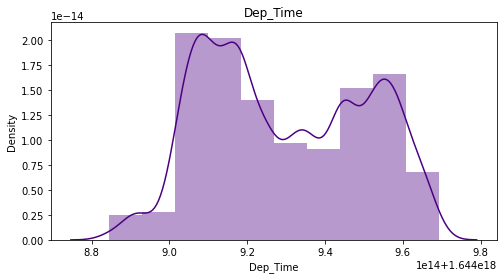

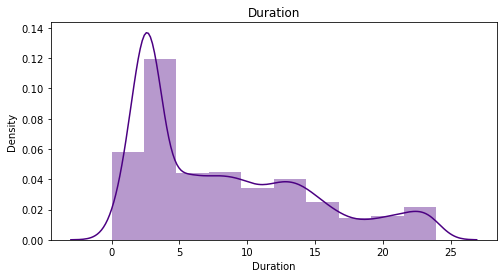

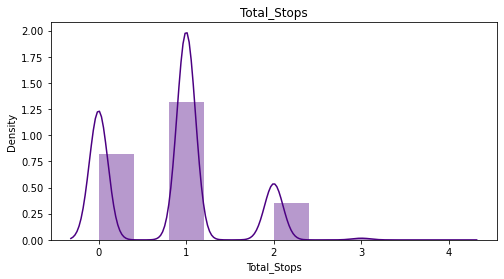

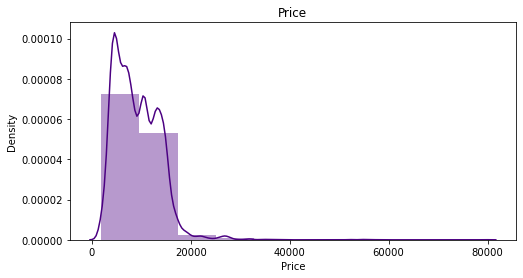

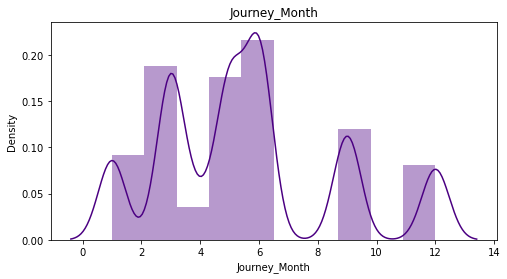

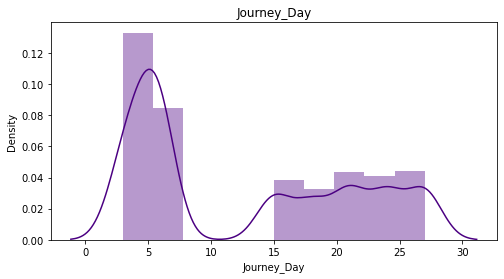

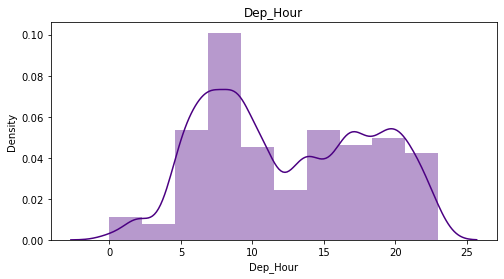

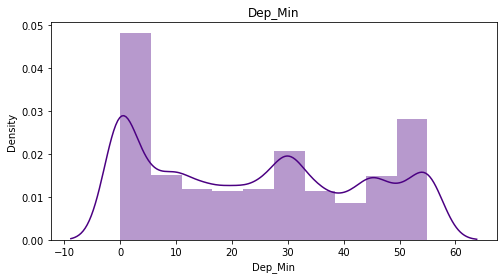

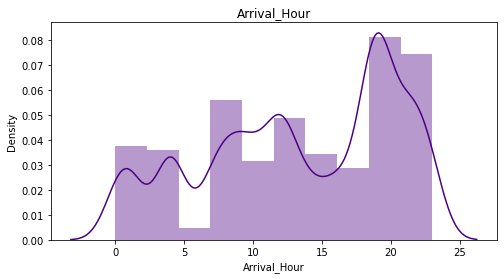

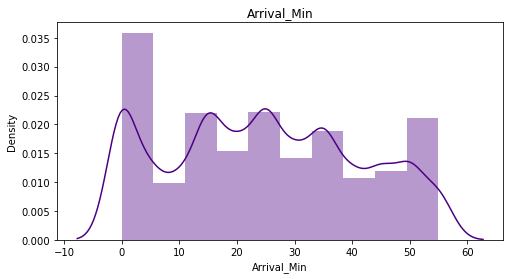

In [25]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

#### Observation from above graphs

1) Almost all the graph distribution seems to be skeewed , so we need to handel it later.

2) Mostly Duration of journey is within 10 hour.

3)The frequency of "1" is highest in Total stop, ans " 3 " have lowest frequency.

4) Usually Price is within 20000 INR , yes there are possibilities of flight having price above 20000 ,but thats just a rare chance.

5) The frequency is highest between 4-6 in Journey month , which means maximum customer travel between month 4-6.


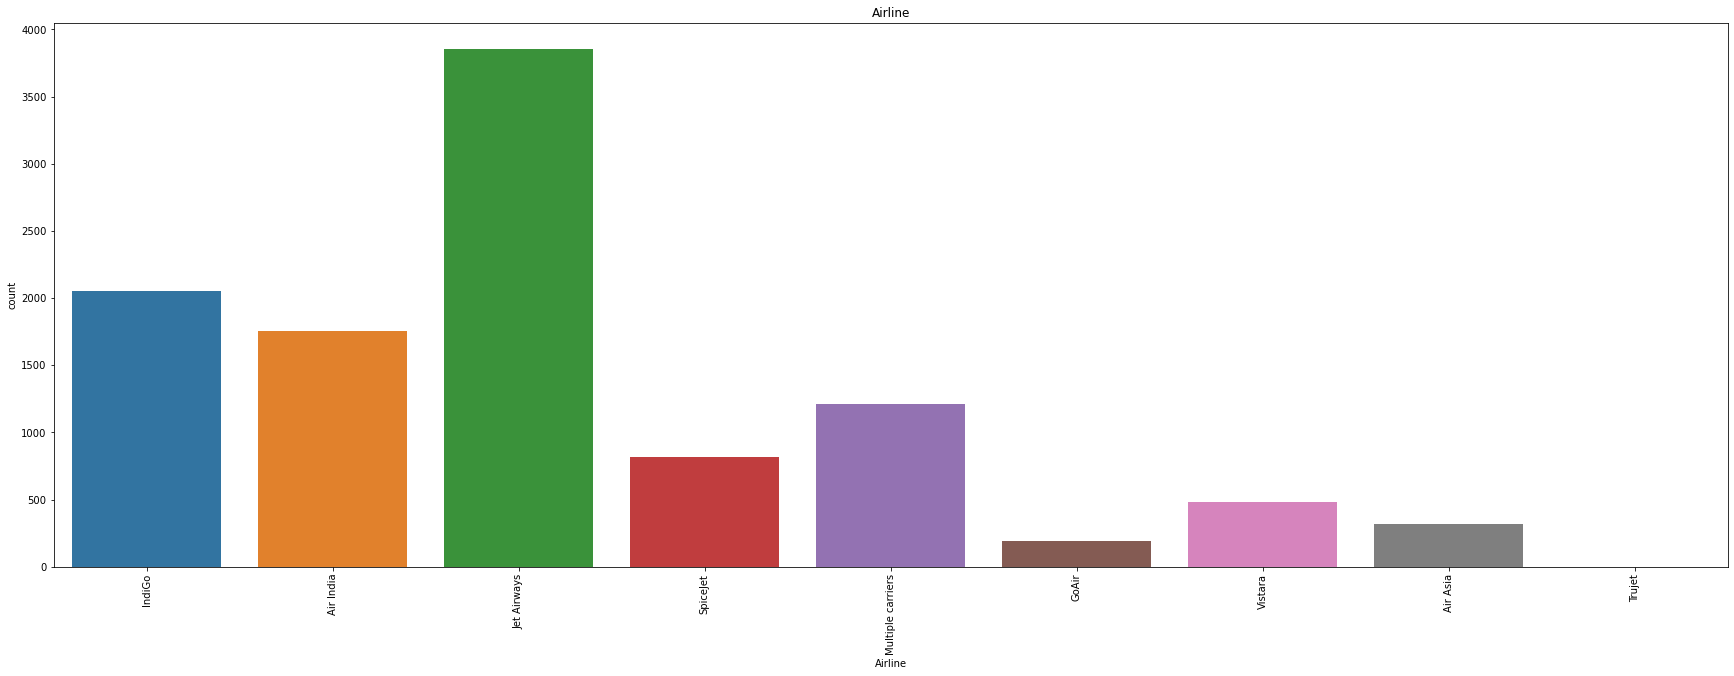

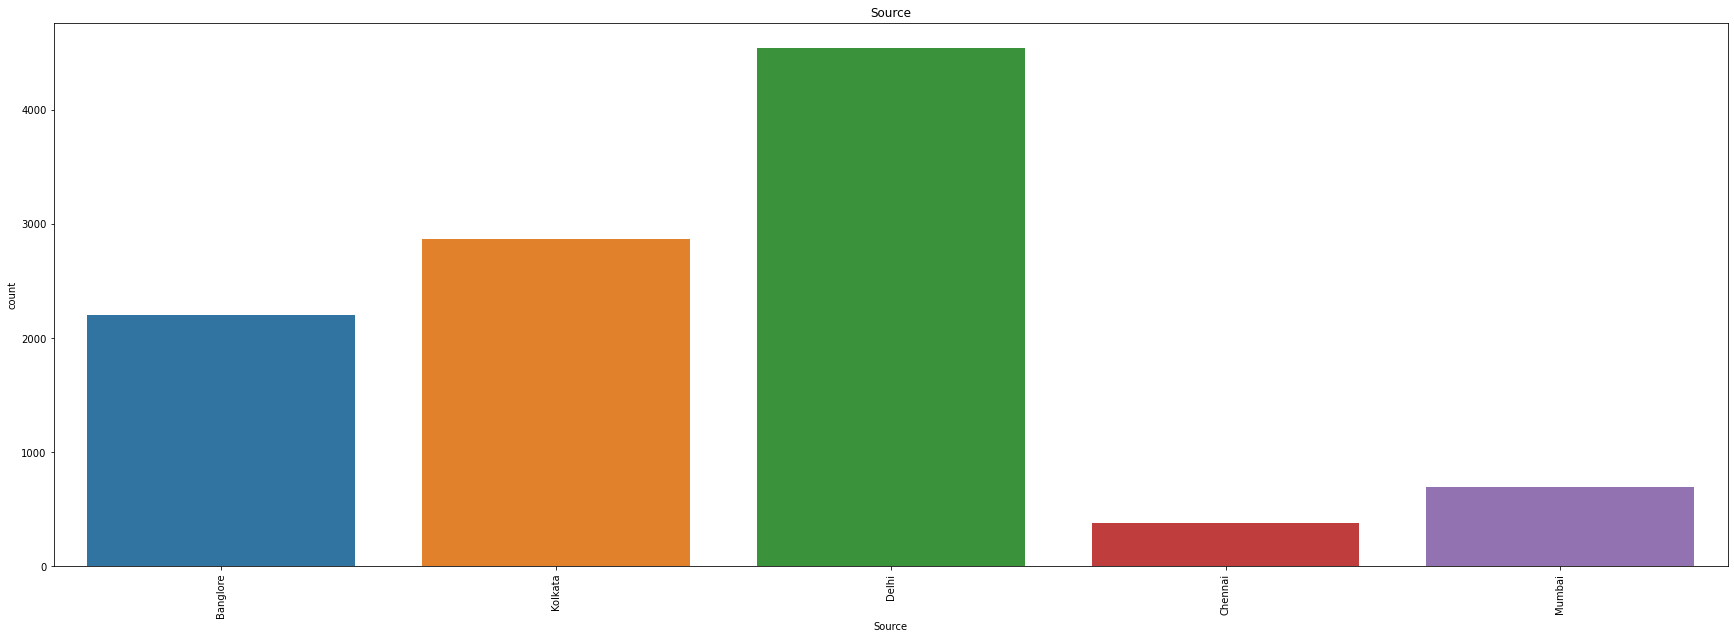

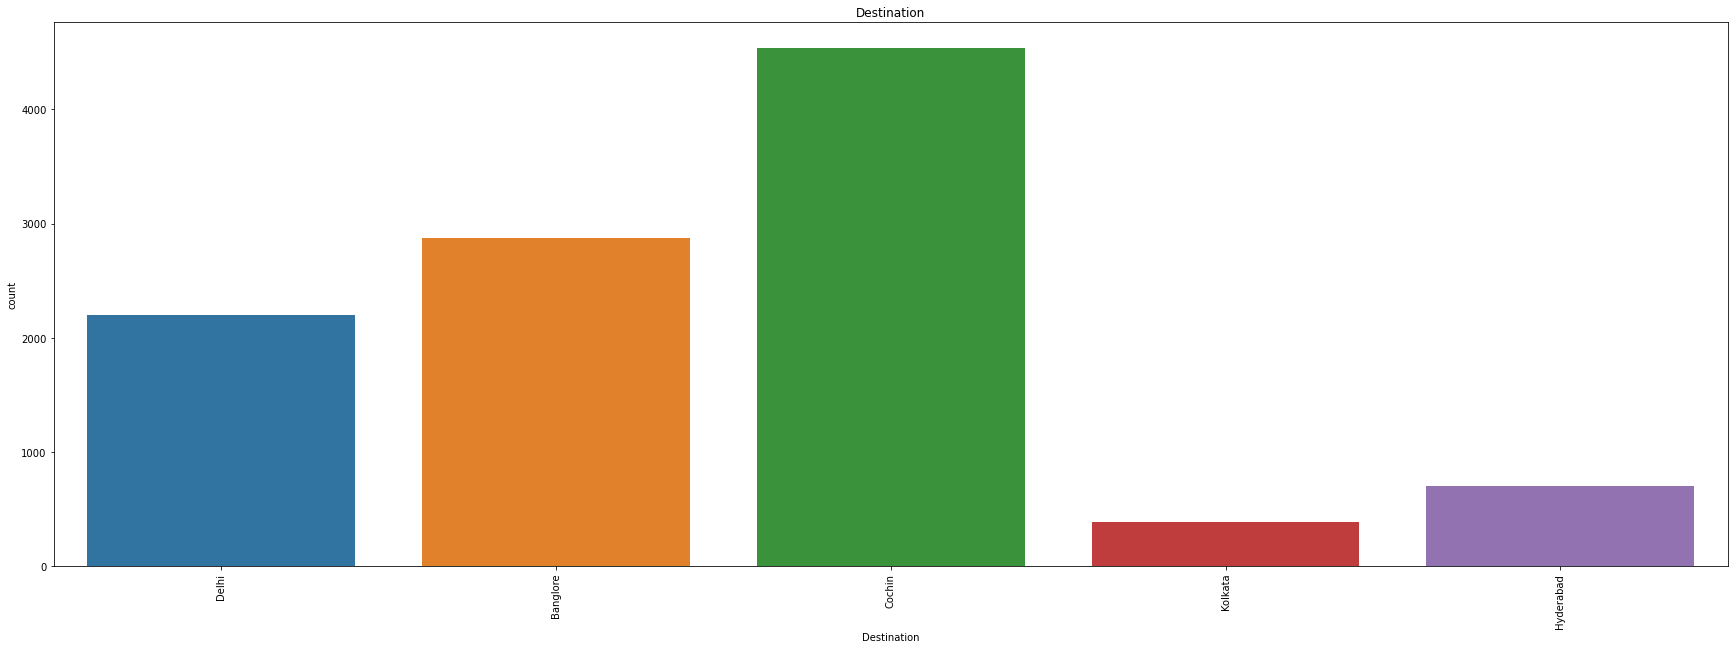

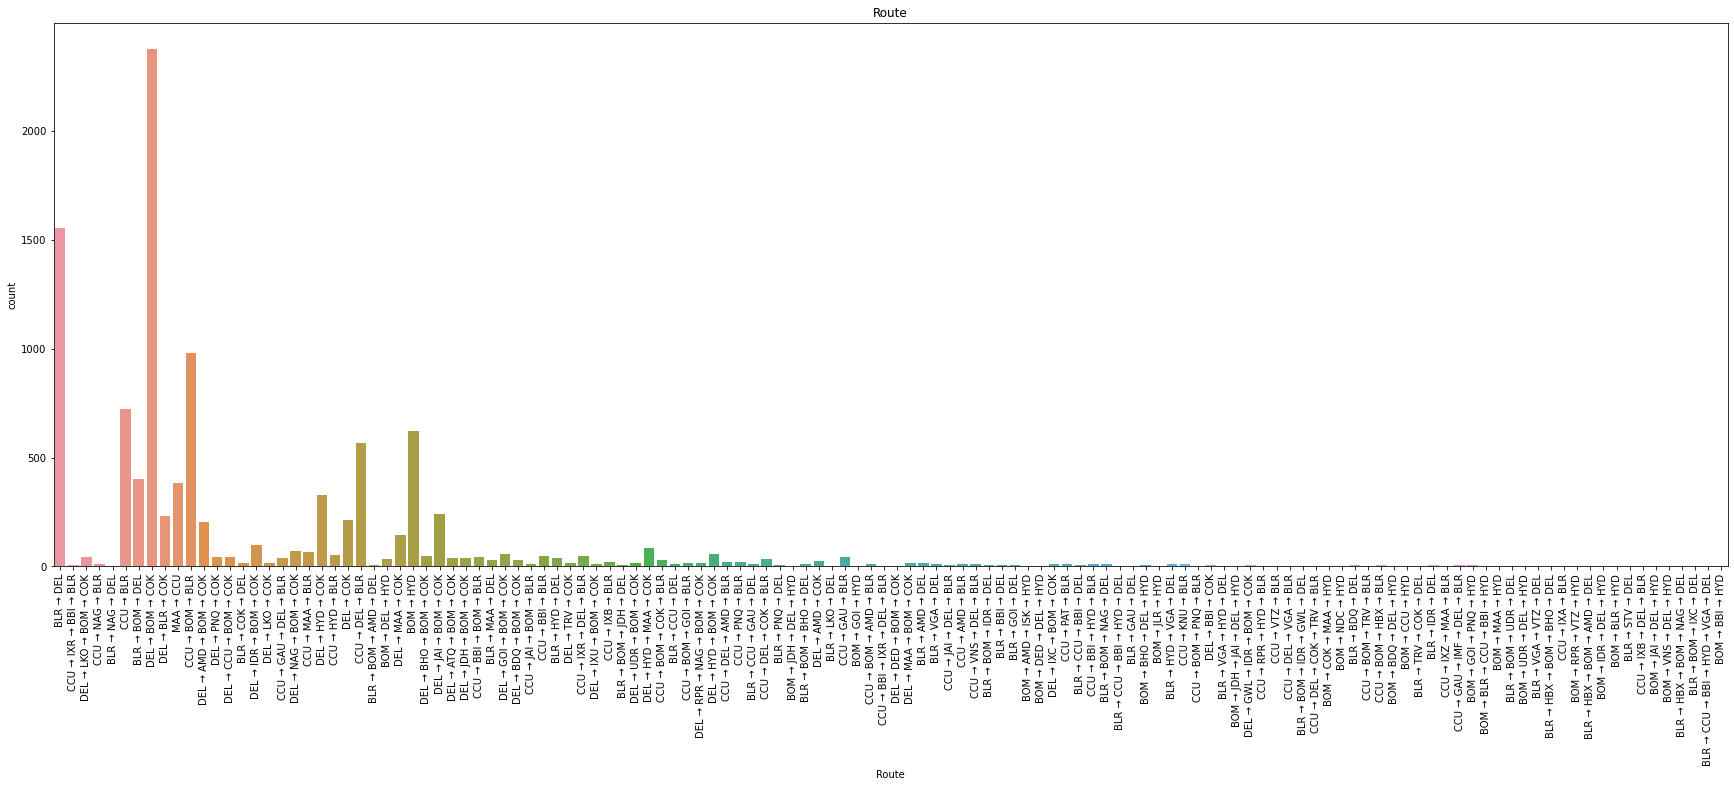

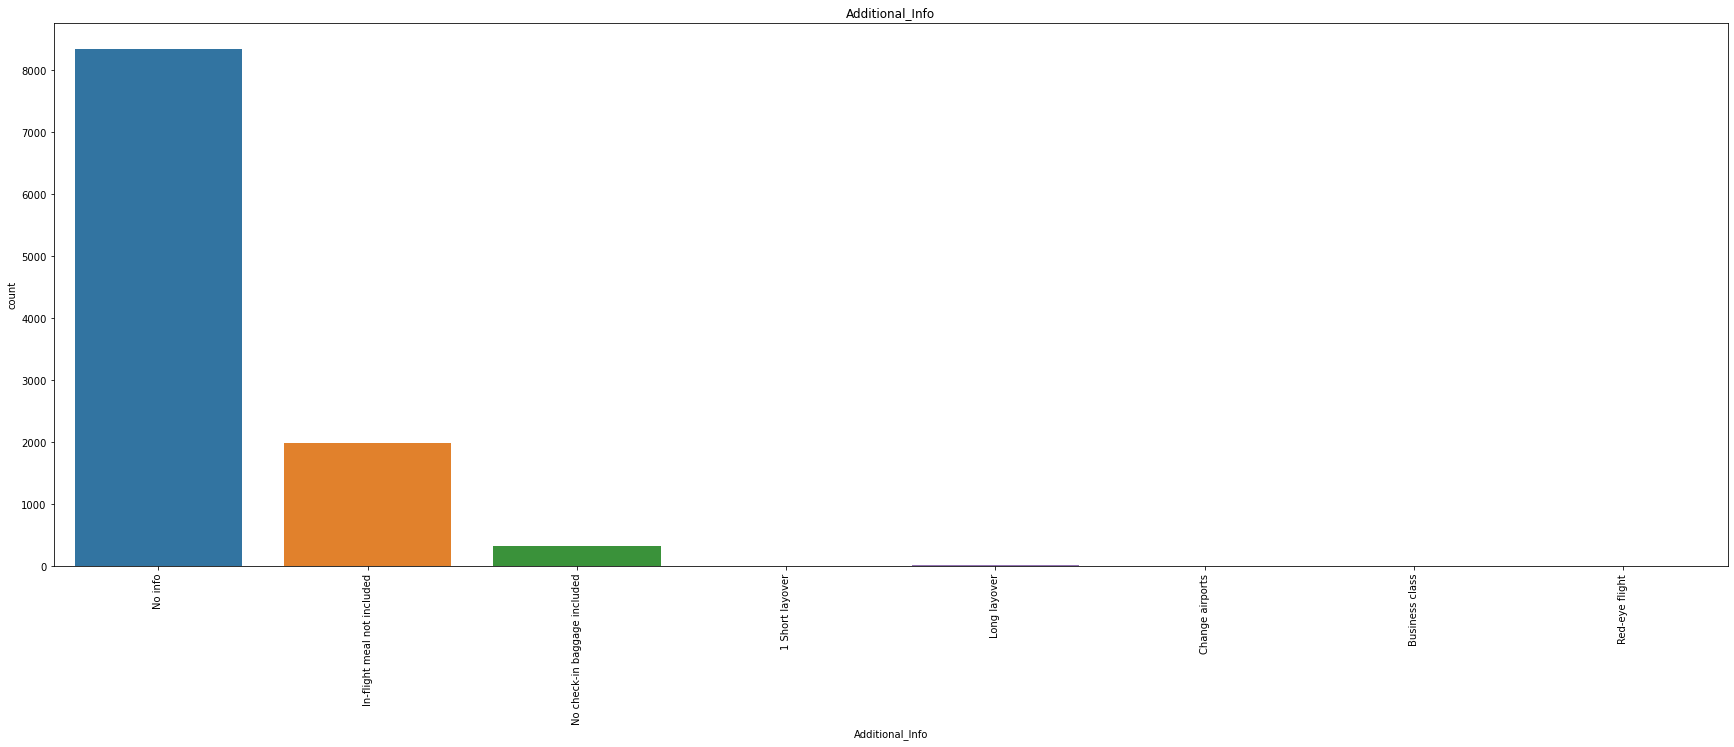

In [26]:
# Count plot for all Categorical columns 
for i in df[categorical_columns]:              
    plt.figure(figsize = (30,10))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

####  Observation from above

1) Jet airways dominates in aviation market.As it have the highest count,and customer mostly prefer jet airways over other airlines.

2) Count of delhi is highest in source column , which indicates a large amount of people travel from delhi.

3) Count of cochin is highest in destination column , which indicates a large amount of people travel towards cochin.

4) Count of route (DEL → BOM → COK ) is highest ,as these are the major cities .

5) Mostly there is no additional info available .

#### Bivariate analysis

comparision between features

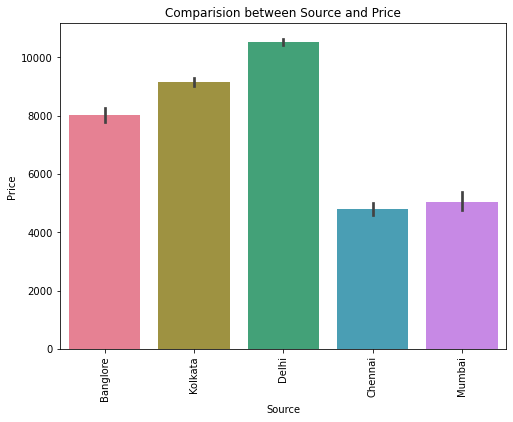

In [27]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Price')
sns.barplot(df['Source'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

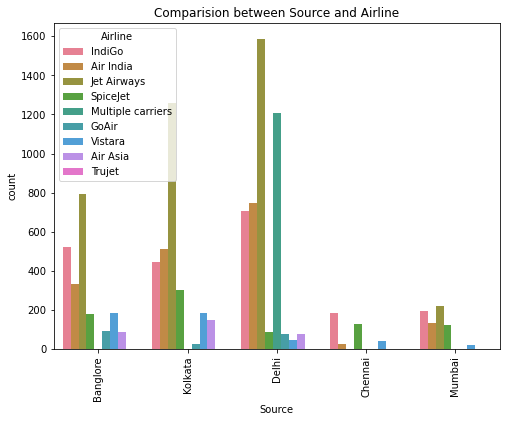

In [28]:
#Comparision between features using count plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Airline')
sns.countplot(x="Source",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


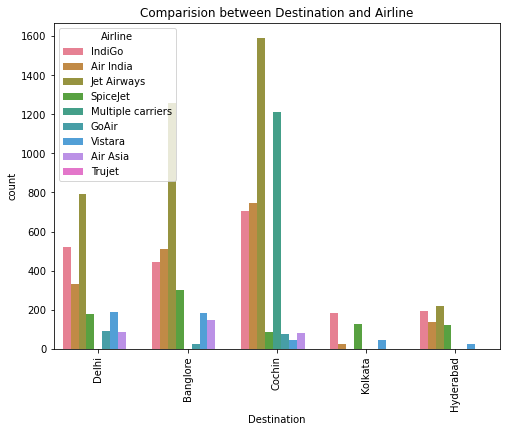

In [29]:
#Comparision between features using count plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Airline')
sns.countplot(x="Destination",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

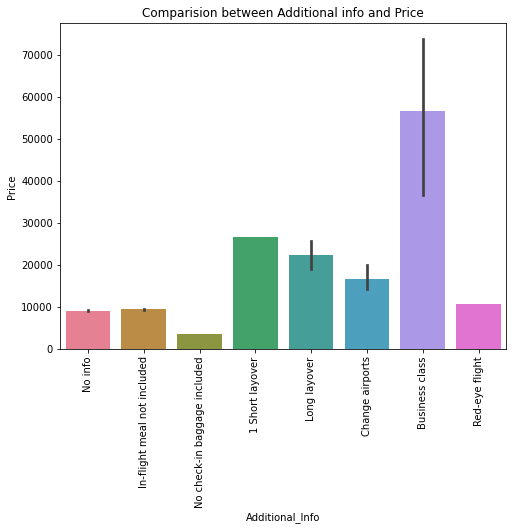

In [30]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Additional info and Price')
sns.barplot(df['Additional_Info'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

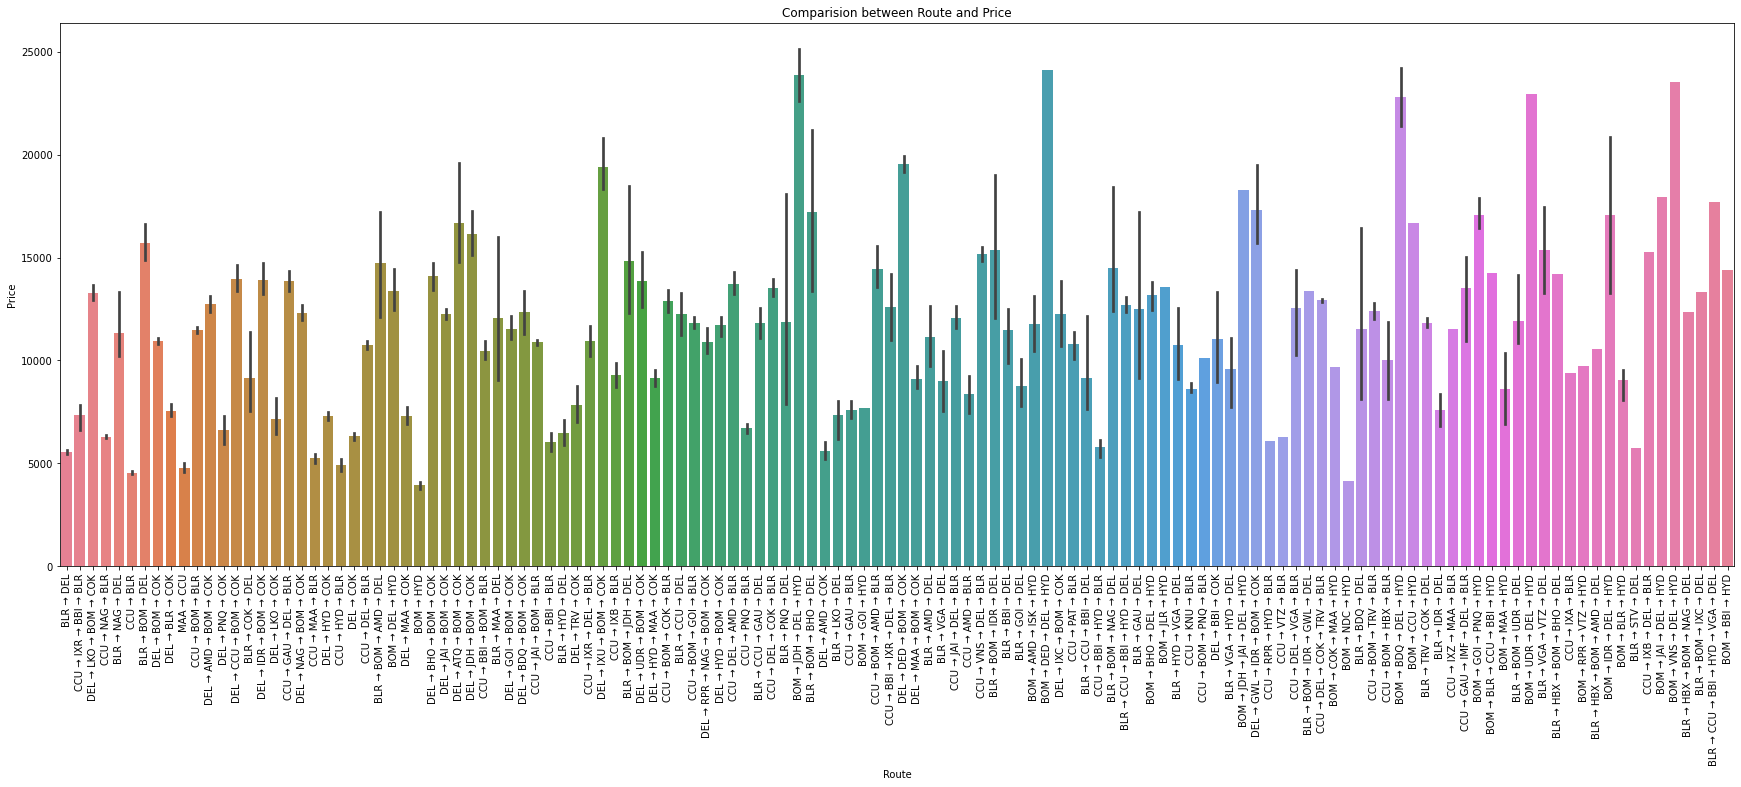

In [31]:
#Comparision between features using box plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Route and Price')
sns.barplot(df['Route'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

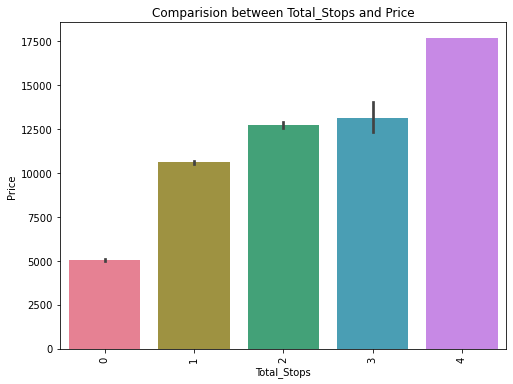

In [32]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Price')
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

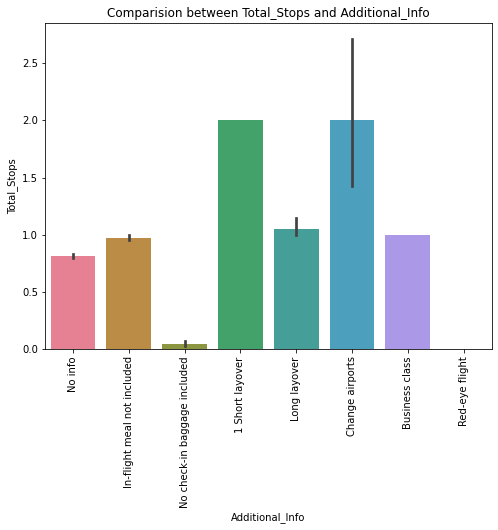

In [33]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Additional_Info')
sns.barplot(df['Additional_Info'],df['Total_Stops'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

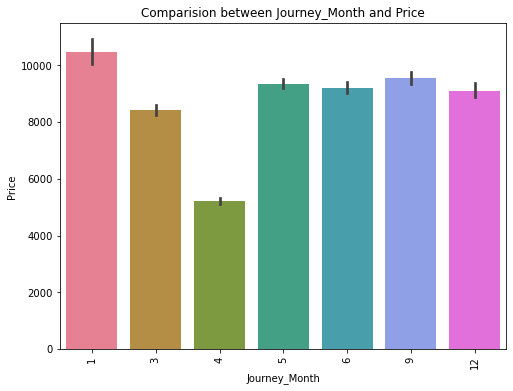

In [34]:


#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Month and Price')
sns.barplot(df['Journey_Month'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

## Data Cleaning

<AxesSubplot:>

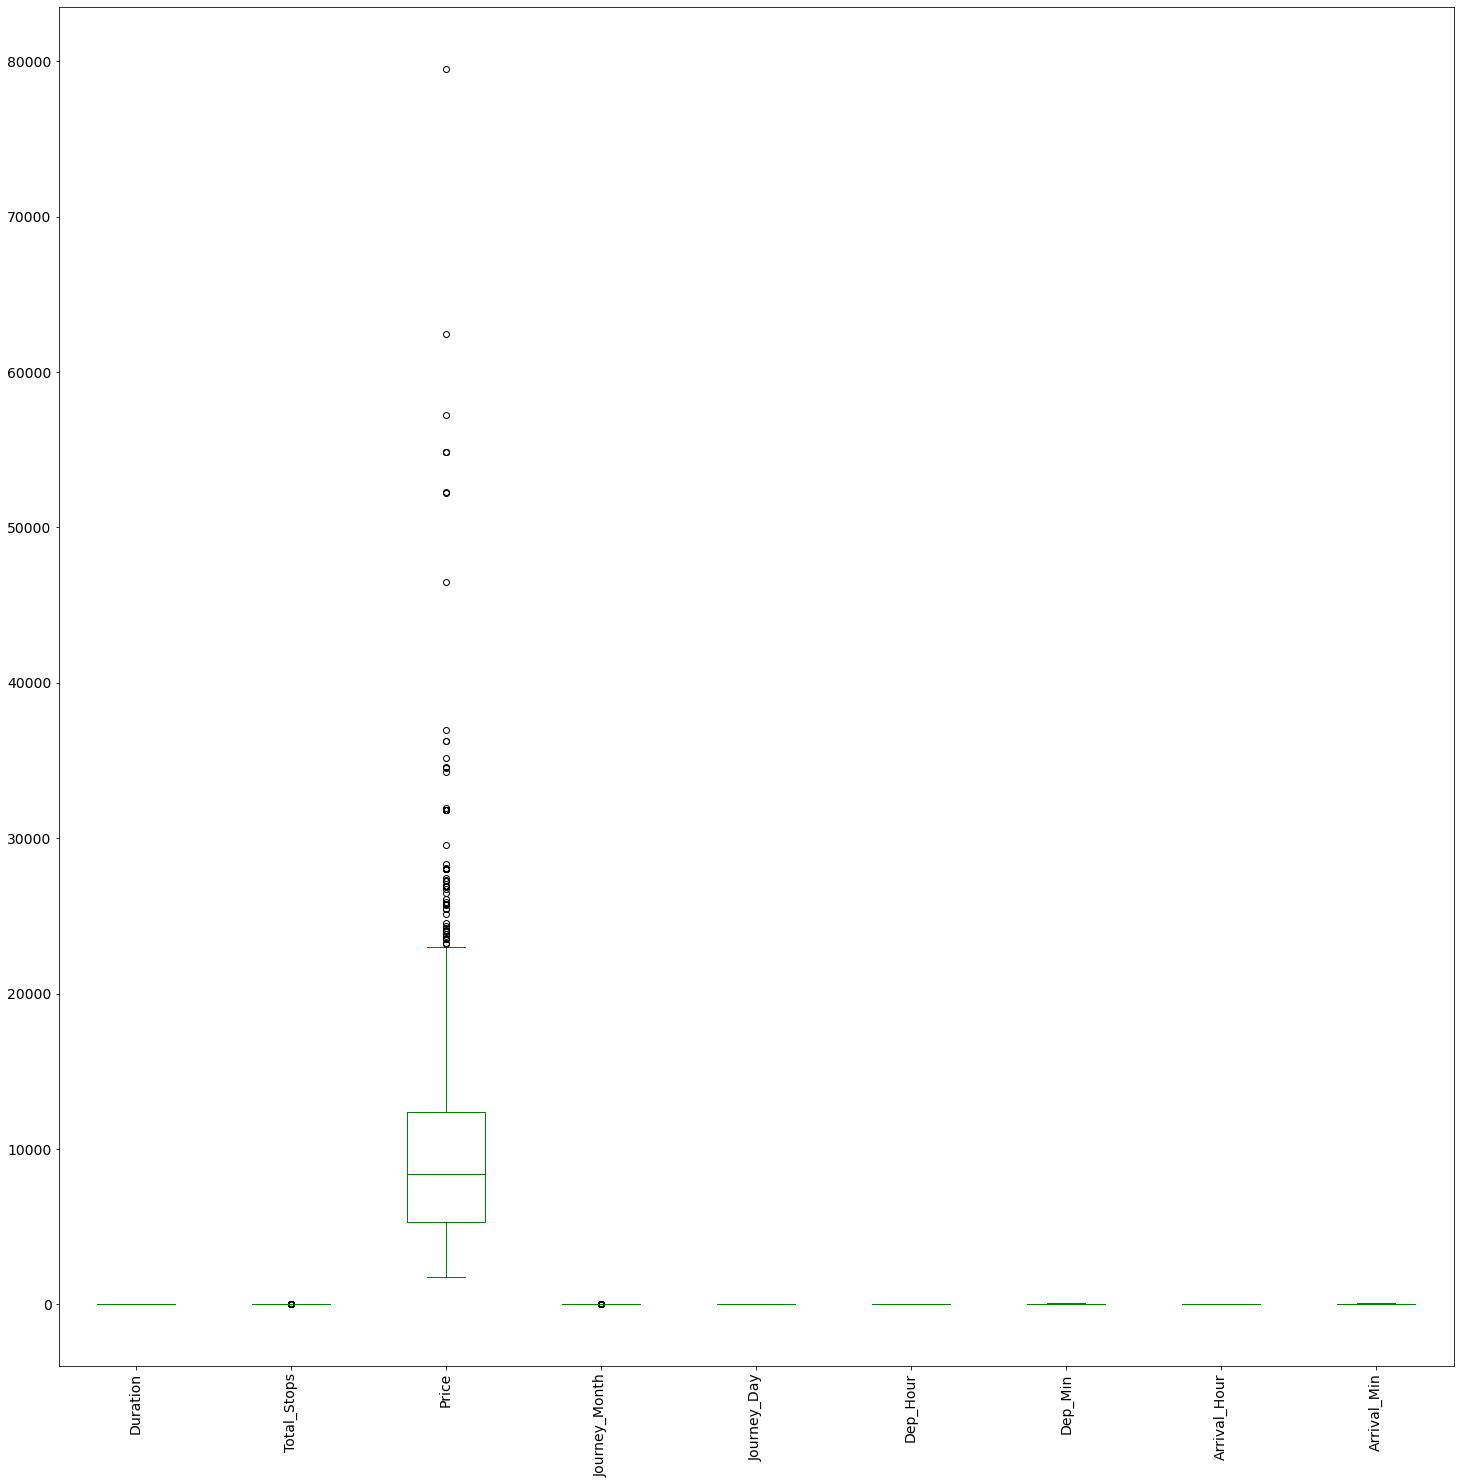

In [35]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='g')

In [36]:
#Checking for skewness
df.skew()

Duration         0.828928
Total_Stops      0.317049
Price            1.812552
Journey_Month    0.629540
Journey_Day      0.367373
Dep_Hour         0.113073
Dep_Min          0.167029
Arrival_Hour    -0.369988
Arrival_Min      0.110945
dtype: float64

In [37]:
#Creating a list of skewed features
fea=["Duration","Journey_Month"]

#Taking a list as fea with all the columns with skewness.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [38]:
df[fea] = scaler.fit_transform(df[fea].values)

In [39]:
df.skew()

Duration        -0.003112
Total_Stops      0.317049
Price            1.812552
Journey_Month   -0.026453
Journey_Day      0.367373
Dep_Hour         0.113073
Dep_Min          0.167029
Arrival_Hour    -0.369988
Arrival_Min      0.110945
dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

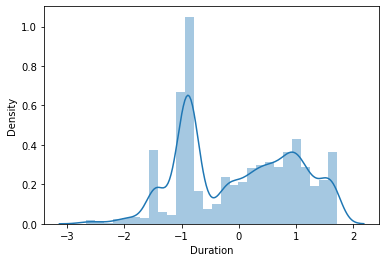

In [40]:
sns.distplot(df['Duration'])

<AxesSubplot:xlabel='Journey_Month', ylabel='Density'>

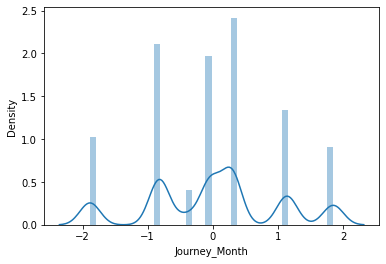

In [41]:
sns.distplot(df['Journey_Month'])

#### Encoding categorical columns

In [42]:

# Separating categorical columns in df(our dataset)
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [43]:
# Importing Label encoder and encoding the categorical column

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)
df[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,2,18,6
1,1,3,0,84,6
2,4,2,1,118,6
3,3,3,0,91,6
4,3,0,2,29,6


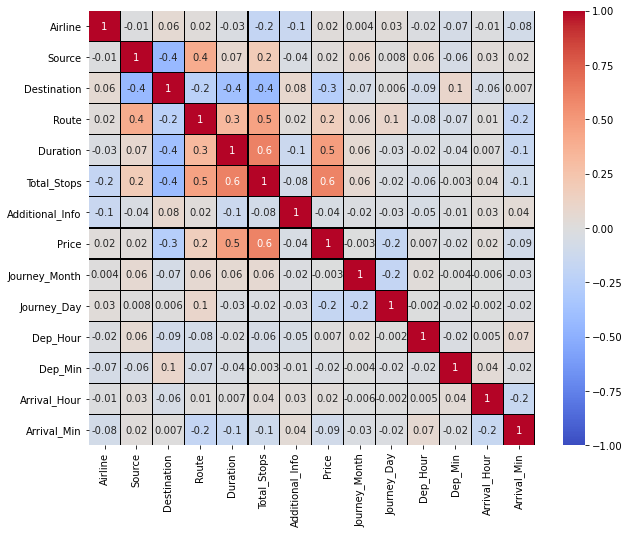

In [44]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

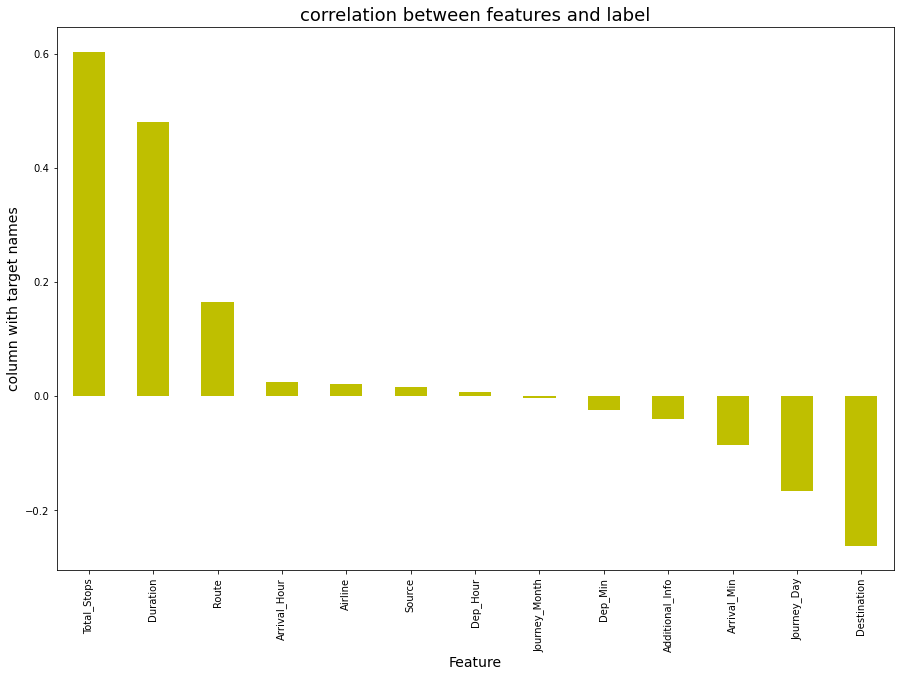

In [45]:
plt.figure(figsize=(15,10))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation between features and label',fontsize=18)
plt.show()

# B) Testing dataset:

In [46]:
# As we already have imported testing dataset,let's see how it looks.

df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,2022-02-15 22:20:00,-0.853228,0,6,3897,-0.819960,24,22,20,1,10
1,1,3,0,84,2022-02-15 05:50:00,0.220299,2,6,7662,-1.885503,5,5,50,13,15
2,4,2,1,118,2022-02-15 09:25:00,1.412764,2,6,13882,1.138622,6,9,25,4,25
3,3,3,0,91,2022-02-15 18:05:00,-0.151116,1,6,6218,1.847496,5,18,5,23,30
4,3,0,2,29,2022-02-15 16:50:00,-0.300965,1,6,13302,-1.885503,3,16,50,21,35


In [47]:
# Checking shape of column
dff.shape


(2671, 10)

In [48]:
# Lets check the datatype
dff.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [49]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Month      0
Journey_Day        0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [50]:
#Checking unique values of each column
dff.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [51]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in dff.columns:
        print(dff[i].value_counts())
        print('*******')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*******
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
3/04/2019

## Feature Engineering

In [52]:
#Converting object data type to datetime 
dff['Date_of_Journey'] =  pd.to_datetime(dff['Date_of_Journey'])
dff['Dep_Time'] =  pd.to_datetime(dff['Dep_Time'])
dff['Arrival_Time'] =  pd.to_datetime(dff['Arrival_Time'])

In [53]:
#Checking the data types of all columns again
dff.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [54]:
#Extracting journey year,month and day from Date_of_journey

#Extracting year
dff["Journey_Year"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
dff["Journey_Month"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
dff["Journey_Day"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.day

In [55]:
#Droping Date_of_journey column after extraction
dff = dff.drop(["Date_of_Journey"],axis=1)

In [56]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (dff["Arrival_Time"]-dff["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
dff["Duration"] = Difference_list

In [57]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
dff["Dep_Hour"]=pd.to_datetime(dff["Dep_Time"]).dt.hour

#Extracting Hours
dff["Dep_Min"]=pd.to_datetime(dff["Dep_Time"]).dt.minute
#Droping Dep_Time column after extraction
dff = dff.drop(["Dep_Time"],axis=1)

In [58]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
dff["Arrival_Hour"]=pd.to_datetime(dff["Arrival_Time"]).dt.hour

#Extracting Hours
dff["Arrival_Min"]=pd.to_datetime(dff["Arrival_Time"]).dt.minute
#Droping Arrival_Time column after extraction
dff = dff.drop(["Arrival_Time"],axis=1)

In [59]:
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,2019,6,24,23,55,2,45


In [60]:
dff.shape

(2671, 14)

In [61]:
#Lets check the value counts now
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
****************************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
****************************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → 

In [62]:
#Grouping Airlines column
dff["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

dff["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

dff["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

#Grouping Destination column
dff["Destination"].replace("New Delhi","Delhi",inplace=True)

#Grouping Additional_Info column

dff["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("1 Short layover ","Short layover",inplace=True)

dff["Additional_Info"].replace("No Info","No info",inplace=True)

#Let me assign values for Total_Stops column
dff.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)
#Printing the dataset
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,2019,6,24,23,55,2,45


In [63]:
#Checking statistics of data set
dff.describe()

,Duration,Total_Stops,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.0,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,8.308187,0.833396,2019.0,5.607263,12.026956,12.603519,24.891426,13.585174,24.558218
std,6.331450,0.672315,0.0,3.042952,8.564408,5.686673,19.086522,7.040396,16.775436
min,0.000000,0.000000,2019.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.833333,0.000000,2019.0,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.500000,1.000000,2019.0,5.000000,6.000000,12.000000,25.000000,15.000000,25.000000
75%,12.583333,1.000000,2019.0,6.000000,21.000000,18.000000,45.000000,19.000000,35.000000
max,23.916667,4.000000,2019.0,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:>

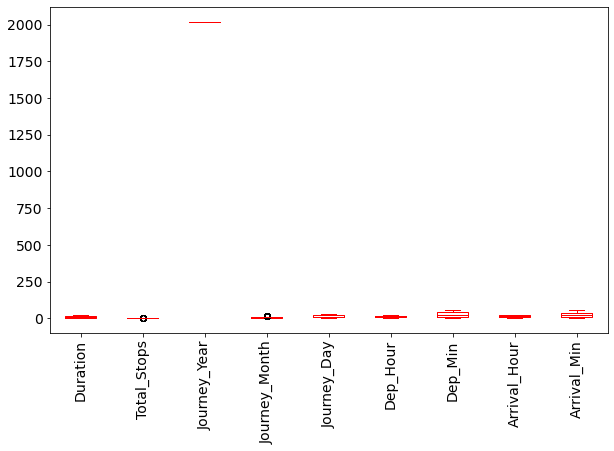

In [64]:

#Checking for outliers using boxplot
dff.plot(rot = 90,kind='box',fontsize=14,figsize=(10,6),color='r')

In [67]:
#Removing Outliers:
#i) Zscore method:

#Features having outliers
features=dff[['Journey_Month']]

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(features))
dff_new=dff[(z<3).all(axis=1)]
dff_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,2019,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23.916667,1,No info,2019,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,2019,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6.583333,1,No info,2019,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15.250000,1,No info,2019,6,3,4,0,19,15


In [69]:
#Checking shape of new dataset
dff_new.shape

(2671, 14)

In [70]:
dff.shape

(2671, 14)

In [71]:
#ii) IQR mathod:

# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [72]:
#Checking shape of new dataset
dff_1.shape

(2414, 14)

In [73]:
dff.shape

(2671, 14)

In [74]:
#Checking dataloss in IQR method
Dataloss = (((2671-2414)/2671)*100)
Dataloss

9.621864470235867

In [75]:
#Checking for skewness
dff_1.skew()

Duration         0.812134
Total_Stops      0.327634
Journey_Year     0.000000
Journey_Month    0.156564
Journey_Day      0.310730
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

In [76]:
#Creating a list of skewed features
fea=["Duration"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [77]:
dff_1[fea] = scaler.fit_transform(dff_1[fea].values)

In [78]:
#Checking skewness again
dff_1[fea].skew()

Duration   -0.01338
dtype: float64

In [79]:
# Separating categorical columns in dff_1
cat_col=[]
for i in dff_1.dtypes.index:
    if dff_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [80]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dff_1[cat_col]= dff_1[cat_col].apply(LE.fit_transform)
dff_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,70,5
2,4,2,1,70,2
3,5,2,1,70,5
4,0,0,2,14,5
7,3,3,0,52,5


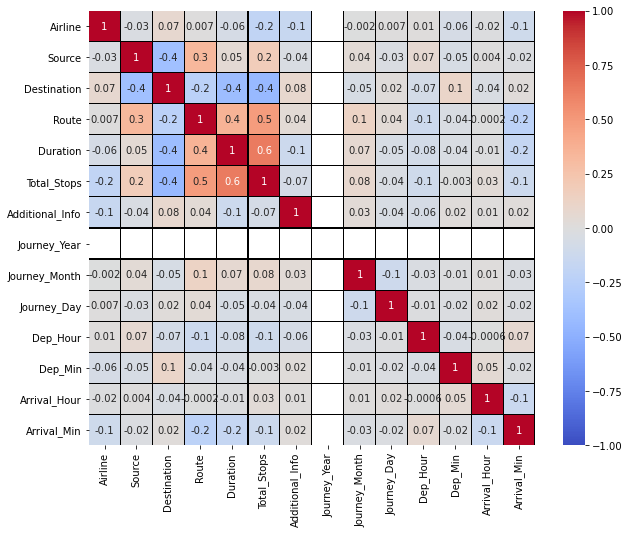

In [81]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(dff_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

In [82]:
#Scaling the data using standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff_1), columns=dff_1.columns)

In [83]:
X_1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.243561,0.042047,-0.184755,0.784578,0.679728,0.258811,0.463204,0.0,0.460712,-0.778303,0.787794,0.270961,-1.357442,0.016725
1,0.243561,0.042047,-0.184755,0.784578,1.735062,0.258811,-2.246426,0.0,0.031473,0.948874,1.140228,-0.512706,0.768368,-1.467637
2,0.825697,0.042047,-0.184755,0.784578,0.909146,0.258811,0.463204,0.0,0.031473,0.948874,-0.798160,-1.296373,1.051809,-1.467637
3,-2.084982,-1.649655,0.845266,-1.413788,-0.885227,-1.228737,0.463204,0.0,0.460712,1.294310,1.845097,1.577073,-1.640883,1.204215
4,-0.338574,0.887898,-1.214777,0.077960,-0.221330,0.258811,0.463204,0.0,-1.685484,-0.893448,0.435360,-0.512706,0.910089,0.313598


In [84]:
#Checking for multicolinearity issue using VIF:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.108317,Airline
1,1.353865,Source
2,1.540213,Destination
3,1.582325,Route
4,1.873648,Duration
5,2.150076,Total_Stops
6,1.068353,Additional_Info
7,NaN,Journey_Year
8,1.032979,Journey_Month
9,1.028633,Journey_Day


In [85]:
#Droping Year
X_1=X_1.drop(["Journey_Year"],axis=1)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.108317,Airline
1,1.353865,Source
2,1.540213,Destination
3,1.582325,Route
4,1.873648,Duration
5,2.150076,Total_Stops
6,1.068353,Additional_Info
7,1.032979,Journey_Month
8,1.028633,Journey_Day
9,1.048960,Dep_Hour


# Model Building

In [87]:
#Separating features and label in train dataset:
x = df.drop("Price",axis=1)
y = df["Price"]

In [88]:
#Converting object data type to datetime 
x['Dep_Time'] =  pd.to_numeric(x['Dep_Time'])


In [89]:
#Scaling the data using standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [90]:
X.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.339058,-1.658441,0.815107,-1.547183,1.641255,-0.853228,-1.220744,0.507407,-0.819960,1.285632,1.654259,-0.235050,-1.800427,-0.890057
1,-1.455973,0.890052,-1.159448,0.249876,-1.228743,0.220299,1.741483,0.507407,-1.885503,-0.872652,-1.303095,1.363492,-0.050851,-0.587124
2,0.219400,0.040555,-0.172170,1.175633,-0.605461,1.412764,1.741483,0.507407,1.138622,-0.759058,-0.607247,0.031373,-1.363033,0.018744
3,-0.339058,0.890052,-1.159448,0.440473,0.902013,-0.151116,0.260370,0.507407,1.847496,-0.872652,0.958411,-1.034321,1.407129,0.321677
4,-0.339058,-1.658441,0.815107,-1.247673,0.684589,-0.300965,0.260370,0.507407,-1.885503,-1.099840,0.610487,1.363492,1.115533,0.624611


In [91]:
#Checking for multicolinearity issue using VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.095385,Airline
1,1.497119,Source
2,1.570955,Destination
3,1.594904,Route
4,inf,Dep_Time
5,1.777588,Duration
6,2.051110,Total_Stops
7,1.064038,Additional_Info
8,1.043300,Journey_Month
9,1.053239,Journey_Day


In [92]:

#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [94]:
# Seperating training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=45)

In [98]:
#Regression Algorithms:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

### 1) RandomForestClassifier

In [102]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8611078720453996
mean_squared_error: 2931598.083119736
mean_absolute_error: 701.6198265854443
root_mean_squared_error: 1712.1910182919826


### 2) ExtraTreesRegressor

In [104]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8595081209922867
mean_squared_error: 2965364.050923958
mean_absolute_error: 685.4536864274572
root_mean_squared_error: 1722.0232434331303


In [107]:
from xgboost import XGBRegressor

### 3) XGBRegressor

In [108]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8696234615421742
mean_squared_error: 2751859.416767538
mean_absolute_error: 780.7961893876146
root_mean_squared_error: 1658.8729356908377


### 4) GradientBoostingRegressor

In [109]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7861793630678148
mean_squared_error: 4513115.167813752
mean_absolute_error: 1255.3244883536101
root_mean_squared_error: 2124.40936916917


### 5) KNN()


In [110]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6841330513310062
mean_squared_error: 6667008.093803432
mean_absolute_error: 1430.0496723868953
root_mean_squared_error: 2582.0550137058335


### 6) DecisionTreeRegressor

In [111]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7697091284682592
mean_squared_error: 4860752.639365574
mean_absolute_error: 763.2335933437339
root_mean_squared_error: 2204.7114639710962


### 7) SVR

In [112]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.027552275227674783
mean_squared_error: 20525467.69827406
mean_absolute_error: 3420.141143908548
root_mean_squared_error: 4530.504132905527


## Cross validation Score

In [115]:
print("CV of Random Forest:",cross_val_score(RFR,X,y,cv=5).mean())

print("CV of XG Boost:",cross_val_score(XGB,X,y,cv=5).mean())

print("CV of Extra Tree:",cross_val_score(ETR,X,y,cv=5).mean())

print("CV of Gradient Boosting:",cross_val_score(GBR,X,y,cv=5).mean())

print("CV of Decision Tree:",cross_val_score(DTR,X,y,cv=5).mean())

print("CV of KNN:",cross_val_score(knn,X,y,cv=5).mean())

print("CV of SVR:",cross_val_score(svr,X,y,cv=5).mean())

CV of Random Forest: 0.89110080535388
CV of XG Boost: 0.8939552787550351
CV of Extra Tree: 0.893608059740297
CV of Gradient Boosting: 0.8132416726494966
CV of Decision Tree: 0.8221937795100546
CV of KNN: 0.720213712668457
CV of SVR: 0.028475199757418544


## Hyper Parameter Tuning:

In [117]:

#importing necessary libraries
from sklearn.model_selection import GridSearchCV
parameter = {'gamma':np.arange(0,0.5),
             'n_estimators':[10,100],
             'max_depth': [2,6,10],
              'n_jobs':[-2,-1,1,]}

In [118]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [119]:
# Getting best parameters
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -2}

In [120]:
Best_mod=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 86.96234615421741
mean_squared_error: 2751859.416767538
mean_absolute_error: 780.7961893876146
RMSE value: 1658.8729356908377


# Saving Model

In [121]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

# Predicting Flight Price for test dataset using Saved model of trained dataset:

In [123]:
# Loading the saved model
model=joblib.load("Flight_Price_Prediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 8123.6196,  9873.759 , 15089.786 , ..., 12284.33  , 30029.494 ,
       11343.216 ], dtype=float32)

In [124]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204
Predicted,8123.619629,9873.758789,15089.786133,4602.314453,7162.076172,14433.012695,8487.697266,11204.602539,15341.616211,4611.395508,...,7300.094727,5297.633789,11769.248047,3848.994629,2676.529053,4354.87793,9289.265625,12284.330078,30029.494141,11343.21582
Actual,8625.000000,9021.000000,24017.000000,4804.000000,7050.000000,14388.000000,7670.000000,13587.000000,16704.000000,4145.000000,...,6253.000000,5021.000000,11982.000000,3841.000000,2754.000000,4823.00000,9314.000000,12395.000000,31825.000000,8307.00000


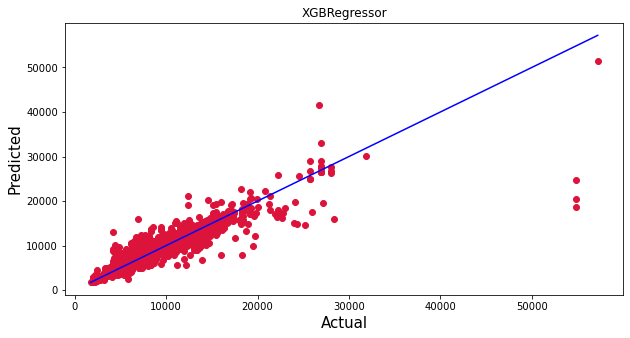

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

In [126]:
#Predicting flight price using cleaned test dataset dff_1
Predicted_Flight_Price=model.predict(dff_1)
Predicted_Flight_Price

array([11099.405, 10490.76 ,  9968.318, ..., 11383.362, 14278.515,
       11666.254], dtype=float32)

In [127]:
#Making dataframe for predicted Price
Flight_Price_Predictions=pd.DataFrame()
Flight_Price_Predictions["Price"]=Predicted_Flight_Price
Flight_Price_Predictions

,Price
0,11099.405273
1,10490.759766
2,9968.318359
3,13695.252930
4,12254.491211
...,...
2409,15473.216797
2410,12525.769531
2411,11383.362305
2412,14278.514648


In [128]:
#Lets save the predictions to csv
Flight_Price_Predictions.to_csv("Flight_Price_Predictions.csv",index=False)

## Conclusion

1) Here we were provided with 2 dataset 1 is our training dataset , which  we used to train and create a ML Model,
and the another one is testing dataset in which we test the accuracy of our model which we trained from our training datset.

2) Here i learn what are the factor affecting the price of our model.

3) I suppose this model will help the customer to predict the irrregular prices of flight.

4) I increase the accuracy of model to 86.9 using Hyper Parameter Tuning.